
# Decision Trees

In [14]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier 
from sklearn.model_selection import train_test_split # Import train_test_split function 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from pprint import pprint
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
%matplotlib inline
#%matplotlib notebook
import seaborn as sns
import pandas as pd
df = pd.read_csv('sonar.csv', header=None)
x_unscaled = df.sample(frac=1, replace=True, random_state=1)
y = x_unscaled[60]
x_unscaled.drop([60],axis=1, inplace=True)

## Use the Sonar dataset

x shape:  (208, 60)


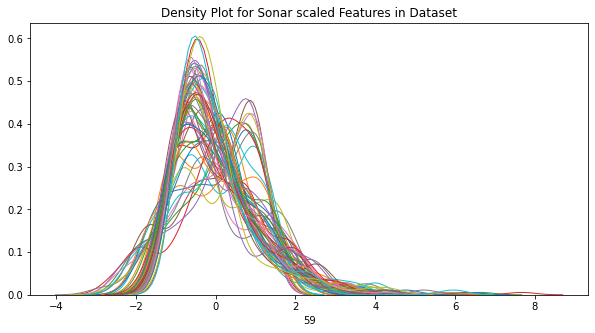

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_unscaled)
x = pd.DataFrame(scaler.transform(x_unscaled), index=x_unscaled.index, columns=x_unscaled.columns)
print("x shape: ",x.shape)
plt.figure(figsize=(10,5))
plt.title('Density Plot for Sonar scaled Features in Dataset')
for i in x.columns:
    # Draw the density plot
    sns.distplot(x[i], hist = False, kde = True,
                 kde_kws = {'linewidth': 1})
    

In [27]:
x[[10,50]].describe()

,10,50
count,2.080000e+02,2.080000e+02
mean,-2.989062e-17,1.024821e-16
std,1.002413e+00,1.002413e+00
min,-1.457818e+00,-1.185540e+00
25%,-8.132420e-01,-6.996136e-01
50%,-1.971152e-02,-2.022988e-01
75%,4.391181e-01,3.405716e-01
max,3.580913e+00,6.323535e+00


## Single Decision Tree (5 Points)

Classifier with `Unscaled` features

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_unscaled, y, test_size=0.3, random_state=1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Unscaled Features Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Predict the response for test dataset
i=0
for w in clf.feature_importances_:
    if w > 0:
        print("The weight of Featire [" + str(i) + "] is " + str(w))
    i+=1


Unscaled Features Accuracy: 0.8571428571428571
The weight of Featire [0] is 0.13167673571154584
The weight of Featire [10] is 0.14267287472747398
The weight of Featire [17] is 0.008853714097837058
The weight of Featire [24] is 0.028967607771046955
The weight of Featire [25] is 0.044495588799386254
The weight of Featire [26] is 0.043961336446735014
The weight of Featire [27] is 0.07898138412464245
The weight of Featire [33] is 0.05366792508697906
The weight of Featire [43] is 0.02507417236169499
The weight of Featire [50] is 0.3553225836446824
The weight of Featire [56] is 0.018539828666410945
The weight of Featire [58] is 0.06778624856156501


Classifier with `Scaled` features

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Scaled Features Accuracy:",metrics.accuracy_score(y_test, y_pred))
i=0
for w in clf.feature_importances_:
    if w > 0:
        print("The weight of Featire [" + str(i) + "] is " + str(w))
    i+=1


Scaled Features Accuracy: 0.8888888888888888
The weight of Featire [0] is 0.13167673571154584
The weight of Featire [10] is 0.14267287472747398
The weight of Featire [17] is 0.053349302897223325
The weight of Featire [23] is 0.018539828666410945
The weight of Featire [24] is 0.02896760777104696
The weight of Featire [26] is 0.043961336446735014
The weight of Featire [27] is 0.07898138412464246
The weight of Featire [43] is 0.02507417236169499
The weight of Featire [50] is 0.35532258364468244
The weight of Featire [51] is 0.05366792508697907
The weight of Featire [58] is 0.06778624856156501


The Decision Tree can be used for feature selection.

The https://github.com/borodark/ie7860/blob/master/Feature%20Selection%20and%20Visualization%20Sonar%20Data%20Set.ipynb
has the lists of best features selected by `F-score`, `Chi Squre` and `Mutual Information`:

* `24 best Features by F score: [ 0  1  3  7  8  9 10 11 12 33 35 36 43 44 45 46 47 48 49 50 51 53 57 59]`
* `24 best Features by Chi^2 score: [ 0  1  3  7  8  9 10 11 12 33 35 36 43 44 45 46 47 48 49 50 51 53 57 59]`
* `24 best by Mutual Information  [ 4  7  8  9 10 11 13 14 15 16 17 18 22 23 28 30 35 36 39 44 46 48 50 54]`

The intersection in between all four is `[10,50]` but we can see the wider match pairwise.  



## Visualize the decision tree
Looks like Variable #50 is very important as wel as other usual suspects known from previous ecpetience with this dataset. 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


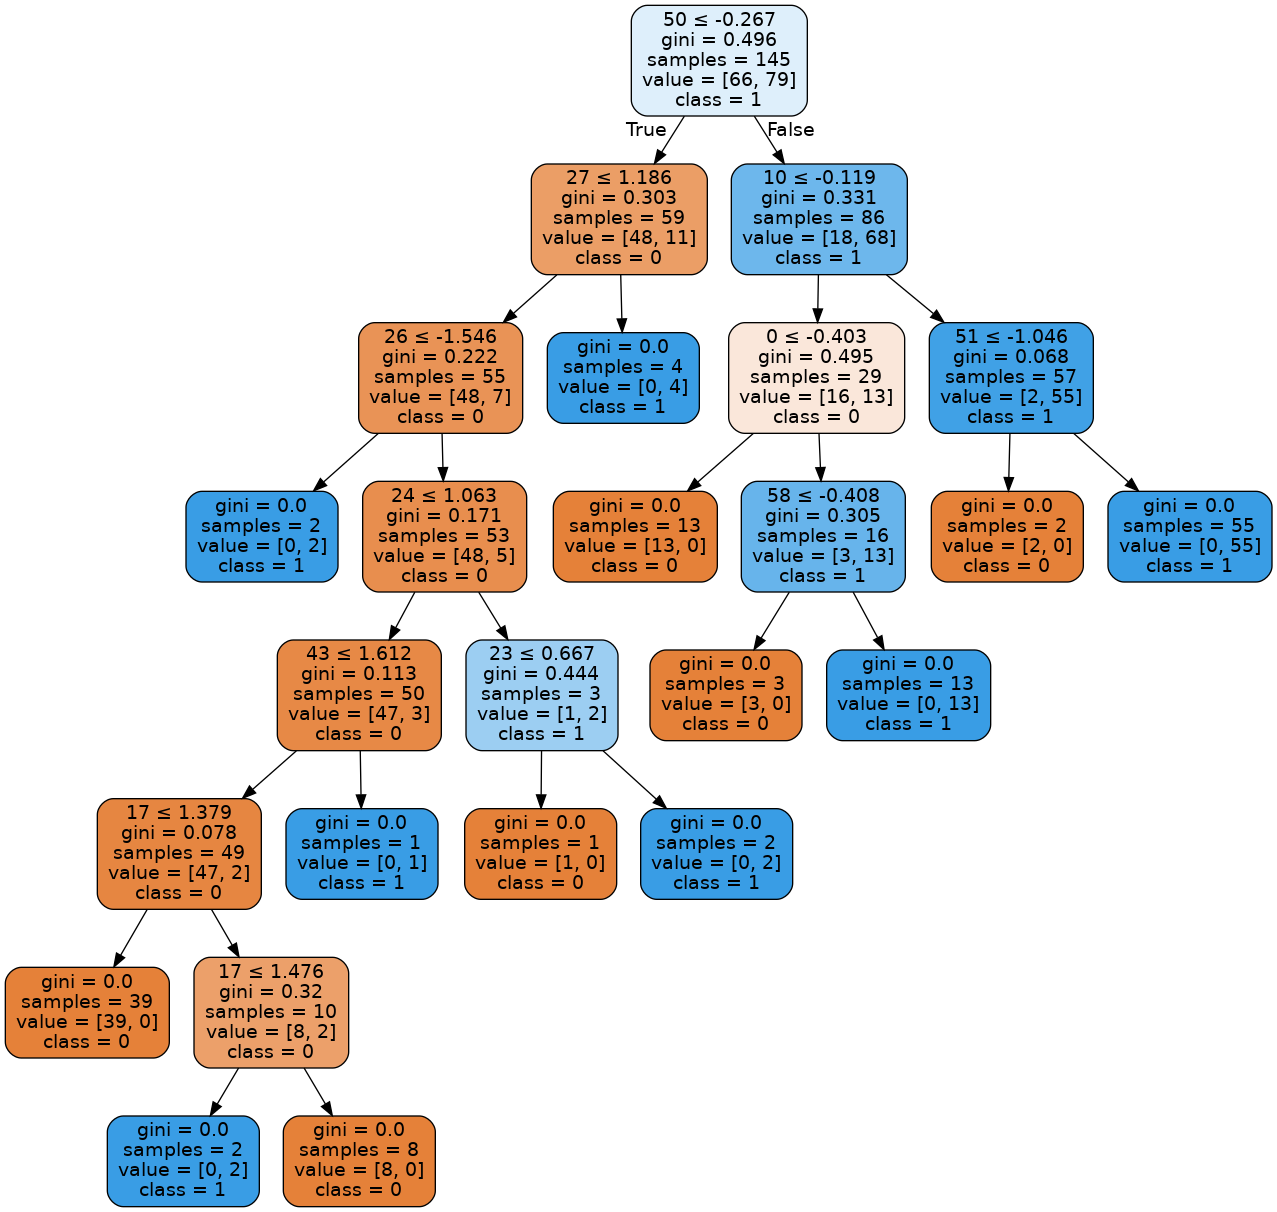

In [25]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns.values.tolist(),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Simple Decision tree works well and fast with the small dataset.

## XGBoost Model (5 Points)

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [5]:
import os

if __name__ == "__main__":
    # NOTE: on posix systems, this *has* to be here and in the
    # `__name__ == "__main__"` clause to run XGBoost in parallel processes
    # using fork, if XGBoost was built with OpenMP support. Otherwise, if you
    # build XGBoost without OpenMP support, you can use fork, which is the
    # default backend for joblib, and omit this.
    try:
        from multiprocessing import set_start_method
    except ImportError:
        raise ImportError("Unable to import multiprocessing.set_start_method."
                          " This example only runs on Python 3.4")
    #set_start_method("forkserver")

    import numpy as np
    from sklearn.model_selection import GridSearchCV
    from sklearn.datasets import load_boston
    import xgboost as xgb

    rng = np.random.RandomState(31337)

    print("Parallel Parameter optimization")
    boston = load_boston()

    os.environ["OMP_NUM_THREADS"] = "16"  # or to whatever you want
    y = boston['target']
    X = boston['data']
    xgb_model = xgb.XGBRegressor()
    clf = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6, 12],
                                   'n_estimators': [50, 100, 200, 800]}, verbose=2,
                       n_jobs=8)
    clf.fit(X, y)
    print(clf.best_score_)
    print(clf.best_params_)

Parallel Parameter optimization
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done  65 out of  80 | elapsed:    8.8s remaining:    2.0s


0.6839859042772509
{'max_depth': 2, 'n_estimators': 100}


[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:   11.1s finished
